In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hansa\Downloads\sri_lanka_western_1_month_rainfall_aggregate.csv",index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1552, 2)


,1_month_rainfall_aggregate,1_month_rainfall_aggregate_avg
Date,,
1981-01-21,78.7623,110.2773
1981-02-01,64.3934,107.7235
1981-02-11,64.3033,109.1060
1981-02-21,72.2541,101.1907
1981-03-01,41.3197,109.3117
...,...,...
2024-01-11,228.2787,125.6929
2024-01-21,191.3033,110.2773
2024-02-01,59.9508,107.7235


In [2]:
df.dtypes

1_month_rainfall_aggregate        float64
1_month_rainfall_aggregate_avg    float64
dtype: object

In [3]:

df.isnull().sum()

1_month_rainfall_aggregate        0
1_month_rainfall_aggregate_avg    0
dtype: int64

<AxesSubplot:xlabel='Date'>

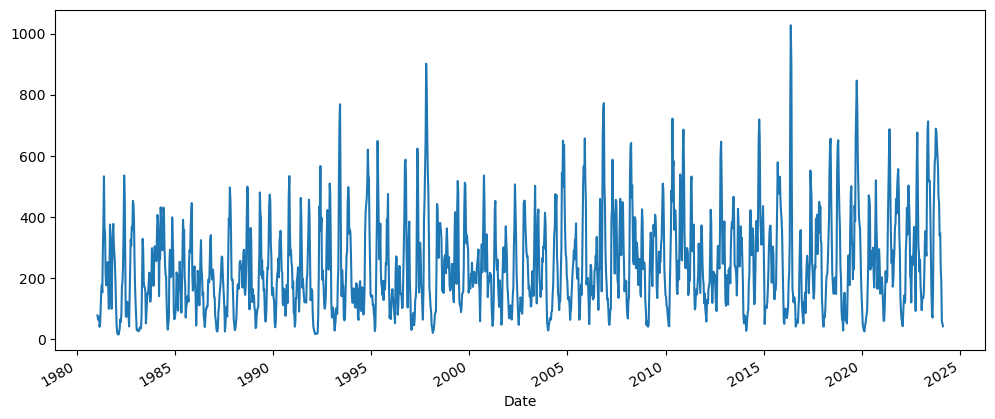

In [4]:
df['1_month_rainfall_aggregate'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

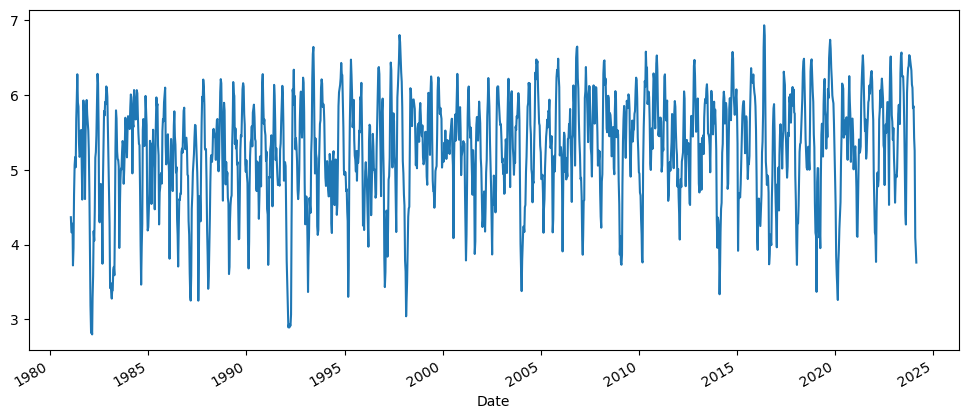

In [5]:
# Transform the series using logarithm
df = np.log(df)
df['1_month_rainfall_aggregate'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['1_month_rainfall_aggregate'])

1. ADF :  -9.683829917824344
2. P-Value :  1.185051590249342e-16
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression: 1527
5. Critical Values :
	 1% :  -3.434639670505874
	 5% :  -2.8634346233980663
	 10% :  -2.567778670304311


In [7]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['1_month_rainfall_aggregate_avg'])

1. ADF :  -39.25106546229141
2. P-Value :  0.0
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression: 1527
5. Critical Values :
	 1% :  -3.434639670505874
	 5% :  -2.8634346233980663
	 10% :  -2.567778670304311


In [8]:
#!pip install pmdarima

In [9]:
import pmdarima as pm

In [10]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['1_month_rainfall_aggregate'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1217.542, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1467.999, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1375.138, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1382.607, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1466.000, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1267.444, Time=0.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1202.077, Time=2.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1238.962, Time=1.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1203.008, Time=5.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1230.692, Time=1.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1100.322, Time=5.25 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=1078.0

In [11]:
df = df.drop(columns='1_month_rainfall_aggregate_avg')
print(df.shape)
train=df.iloc[:1240]
test=df.iloc[1240:]
print(train.shape,test.shape)

(1552, 1)
(1240, 1) (312, 1)


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['1_month_rainfall_aggregate'], order=(5, 1, 4))
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

C:\Users\hansa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hansa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                                   SARIMAX Results                                    
Dep. Variable:     1_month_rainfall_aggregate   No. Observations:                 1240
Model:                         ARIMA(5, 1, 4)   Log Likelihood                -411.236
Date:                        Fri, 24 May 2024   AIC                            842.472
Time:                                20:06:20   BIC                            893.693
Sample:                                     0   HQIC                           861.736
                                       - 1240                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2574      0.289     -0.891      0.373      -0.824       0.309
ar.L2          0.2376      0.153      1.555      0.120      -0.062 

C:\Users\hansa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


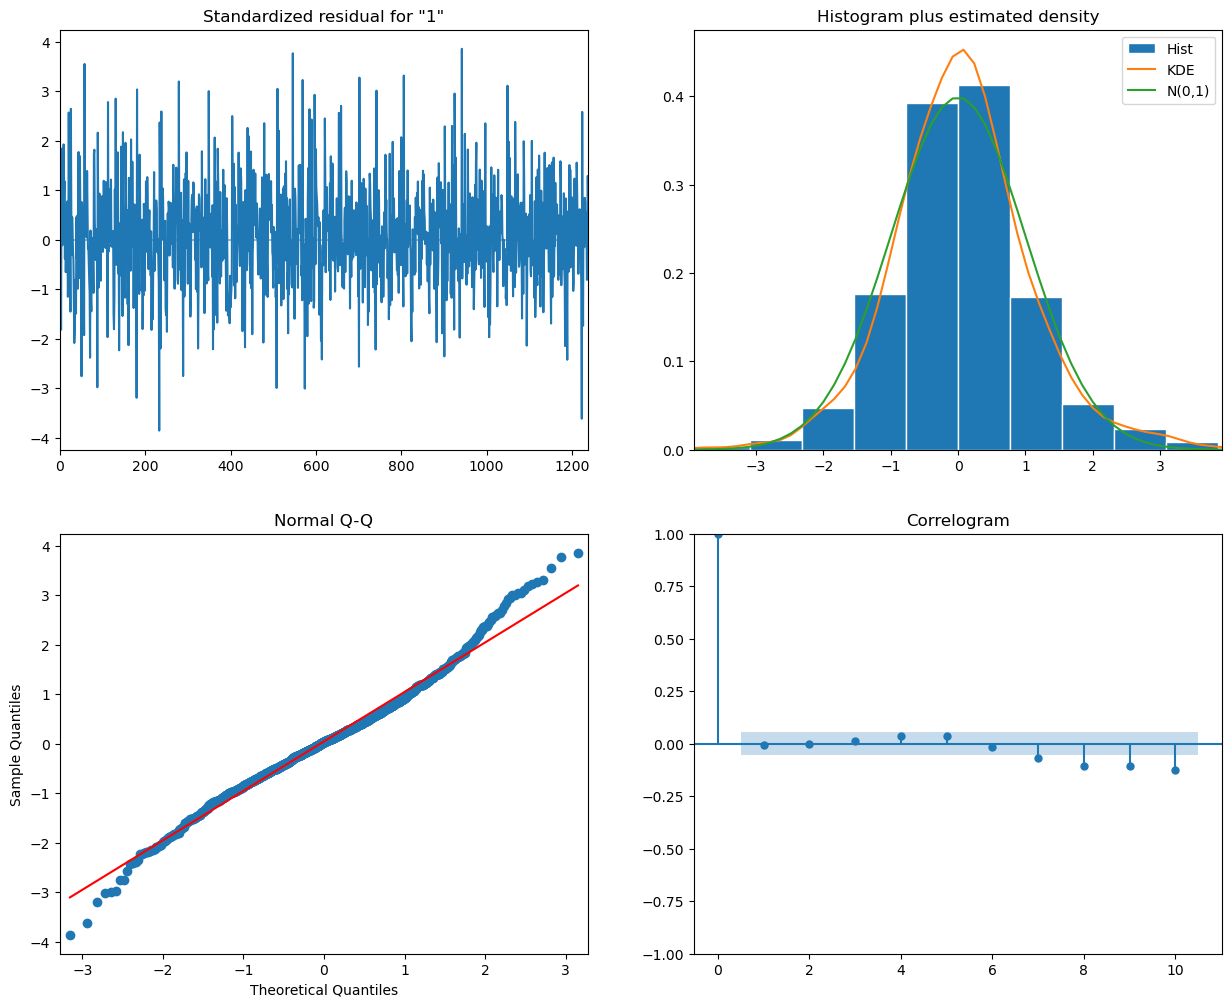

In [13]:
import matplotlib.pyplot as plt

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


In [14]:
import numpy as np

start = len(train)
end = len(train) + len(test) - 1

# Make predictions
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')



from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error


# Calculate performance metrics
mae = mean_absolute_error(test['1_month_rainfall_aggregate'], pred)
mse = mean_squared_error(test['1_month_rainfall_aggregate'], pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['1_month_rainfall_aggregate'], pred)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 0.6195802812821448
Mean Squared Error (MSE): 0.5744973316782838
Root Mean Squared Error (RMSE): 0.7579560222587348
Mean Absolute Percentage Error (MAPE): 0.12319966921744292


C:\Users\hansa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'Actual Values in Test Data')

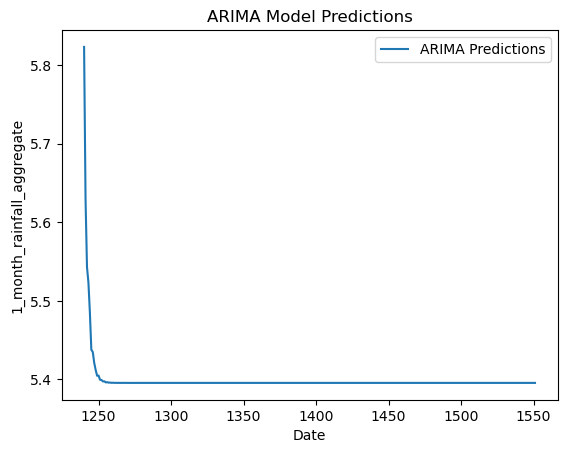

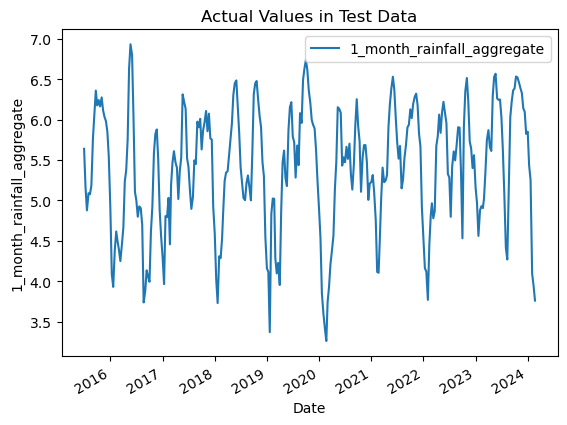

In [15]:


# Plot the predictions and actual values
pred.plot(legend=True)
plt.xlabel('Date')
plt.ylabel('1_month_rainfall_aggregate')
plt.title('ARIMA Model Predictions')
test.plot(legend=True)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('1_month_rainfall_aggregate')
plt.title('Actual Values in Test Data')







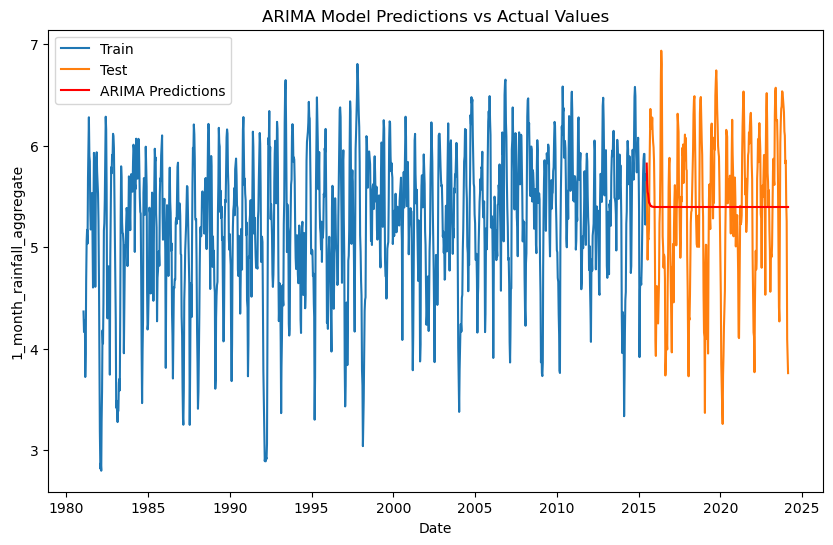

In [16]:
# Align predictions with the date index
pred.index = test.index

# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['1_month_rainfall_aggregate'], label='Train')
plt.plot(test.index, test['1_month_rainfall_aggregate'], label='Test')
plt.plot(pred.index, pred, label='ARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('1_month_rainfall_aggregate')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.legend()
plt.show()
